# Moringa School Week 7 Independent Project 

**Question -** As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25years of experience. You have been tasked to **study the factors that affect housing prices** using the given information on real estate properties that was collected over the past few months. Later onwards, **create a model that would allow the company to accurately predict the sale prices** upon being provided with the predictor variables. 

# 1. Defining the Question 

**a) Specifying the question** 

To study the factors that affect housing prices and creating a model that would allow the company to accurately prediact the sale prices. 

**b) Defining the metric for success**

This project will be considered a success of our top model (based on appropriateness) has an accuracy that falls between 0.8 and 0.65.

**c) Understanding the context** 

This project is being done on behalf of Hass Consulting Company, a real estate leader with over 25 years of experience. We have been tasked with studying the factors that affect housing; and creating a model that would allow the company to accurately prediact the sale prices. 


**d) Recording the experimental design**

*   Data reading and checking
*   Data tidying 
*   Data Exploration
*   Implementing the solution 
*   Modelling 
*   Challenging the solution
*   Follow Up question
*   Conclusion

**e) Data Relevance**

The data provided has the relevant features needed to carry out the project. 

# 2. Reading the Data

In [191]:
#Importing Libraries 
#

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy as sp

import statsmodels.formula.api as smf
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [31]:
#Reading the dataset 
#url = http://bit.ly/IndependentProjectWeek7Dataset
#

df_re = pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')
df_re.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# 3. Checking the Data

In [32]:
#Previewing the top of our dataset 
#

df_re.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [33]:
#Previewing the bottom of our dataset 
#

df_re.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [34]:
#Checking the shape of the data
#

df_re.shape

(21613, 20)

In [35]:
#Checking on the data type 
#

df_re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

# 4. External Data Source Validation 

# 5. Tidying the Dataset

In [37]:
#Checking for missing values 
#

df_re.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

*   The dataset had no missing values.


In [38]:
#Checking for duplicates 
#

df_re.duplicated().sum()

3

In [39]:
#Dropping the duplicates 
#
df_re.drop_duplicates(keep='first', inplace = True)

*   The dataset had three duplicates; that we dropped. 

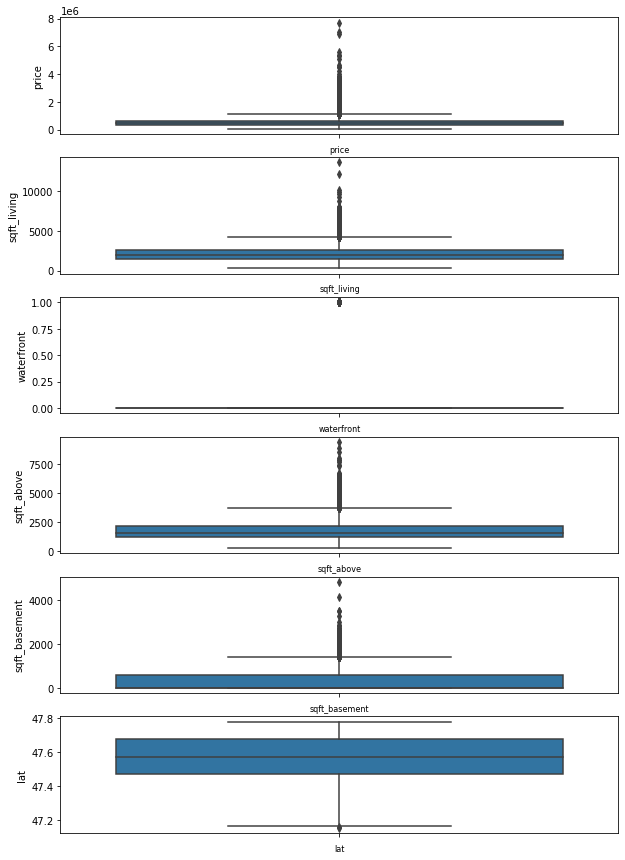

In [40]:
#Checking for outliers
#

col_names= ['price', 'sqft_living', 'waterfront', 'sqft_above', 'sqft_basement', 'lat']
fig, ax = plt.subplots(len(col_names), figsize=(10,15))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df_re[col_val], ax=ax[i])
    
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

*   There are outliers in each of the columns above, we decided not to drop the outliers as they were key to the analysis. 


In [53]:
#Dropping irrelevant columns 
#Why these specific columns were dropped will be explained when we are doing feature engineering  
#

df_re2 = df_re.drop(['id', 'bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'sqft_lot', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'long', 'sqft_living15', 'sqft_lot15'], axis=1)

# 6. Exploratory Analysis

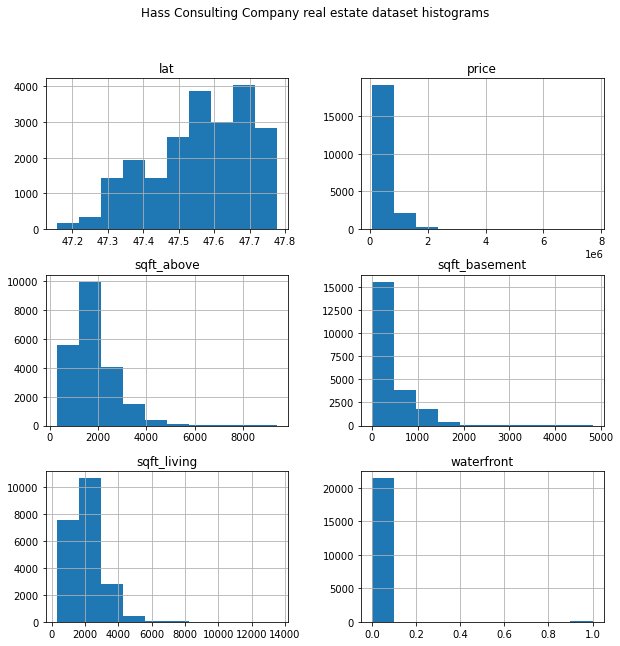

In [52]:
#Histograms of out five main features
#'price', 'sqft_living', 'waterfront', 'sqft_above', 'sqft_basement', 'lat'
#This will help us learn the characters of each column
#

df_re.drop(['id', 'bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'sqft_lot', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'long', 'sqft_living15', 'sqft_lot15'] ,axis=1).hist(bins=10, figsize=(10,10))
plt.suptitle("Hass Consulting Company real estate dataset histograms")
plt.savefig('Real estate Histogram')
plt.show()


In [54]:
#Checking how thw varibales are corelated
#

correlation = df_re2.corr()
correlation


,price,sqft_living,waterfront,sqft_above,sqft_basement,lat
price,1.000000,0.702046,0.266332,0.605569,0.323849,0.306922
sqft_living,0.702046,1.000000,0.103820,0.876600,0.435054,0.052521
waterfront,0.266332,0.103820,1.000000,0.072080,0.080585,-0.014272
sqft_above,0.605569,0.876600,0.072080,1.000000,-0.051923,-0.000823
sqft_basement,0.323849,0.435054,0.080585,-0.051923,1.000000,0.110535
lat,0.306922,0.052521,-0.014272,-0.000823,0.110535,1.000000


*   The is a positive correlation between price and six variables.


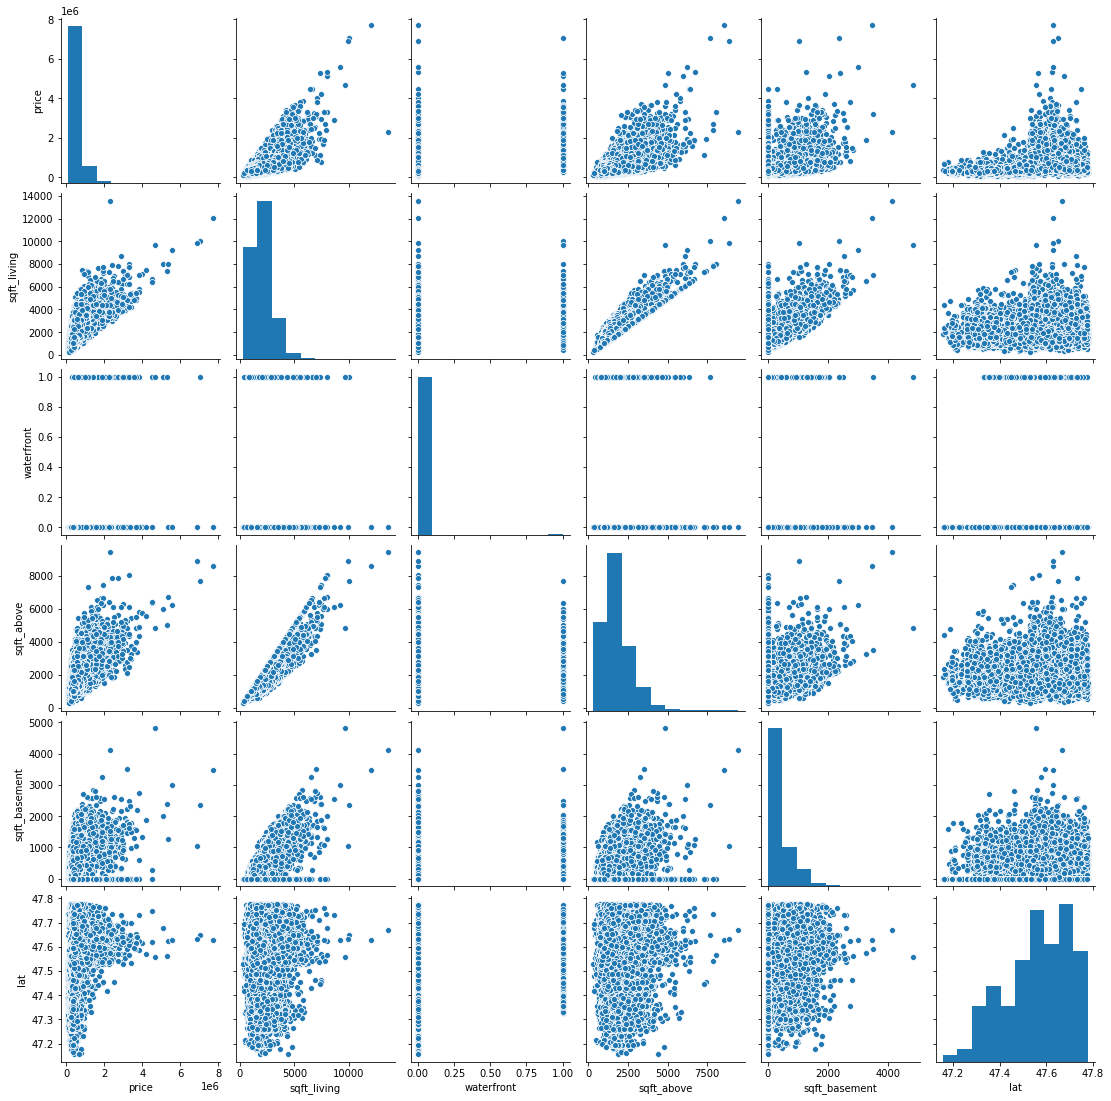

In [55]:
#Bivariate summary of our dataset
#

sns.pairplot(df_re2)
plt.show()

*   I quick over view of the bivariate summary of our dataset shows that most of the variables have a linear relationship and the is presence of mild heteroskedasticity.

# 7. Implementing the Solution

**Feature Engineering**

*   We do not need to encode anything since all columns
have numerical observations. 

In [56]:
#Previewing the columns we have 

df_re.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [57]:
#Creating a new dataframe 
#

f_col= df_re[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]

In [58]:
#find the best 5 features to predict sales prices 

X = f_col.drop("price",axis=1)
Y = f_col['price']

from sklearn.feature_selection import RFE

# Feature extraction
model = LinearRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 5
Selected Features: [False False False  True False False  True False False False  True  True
 False False False  True False False False]
Feature Ranking: [15  6  7  1 14  9  1  4  5  3  1  1  8 12 10  1  2 11 13]


| **Feature -**  |   **Score** |

id - **15**

price - **Dependent** 

bedrooms - **6**

bathrooms - 7

sqft_living (Square feet area of living area) - **1**

sqft_lot - **14**

floors - **9**

waterfront (Whether waterfront is there or not) - **1**

view - **4**

condition - **5**

grade - **3**

sqft_above - **1**

sqft_basement (Square feet area off basement) - **1**

yr_built - **8**

yr_removated - **12**

zipcode - **10**

lat (Longitude of the house) - **1**

long - **2**

sqft_living15 - **11**

sqft_lot15 - **13**

*   I will briefly take you back to the tidying the dataset section; the results of our feature engineering is why the five columns were deemed relevant. 



**Checking for multicollinearity**

In [59]:
#Correlation between our variables
#

correlation = df_re2.corr()
correlation

,price,sqft_living,waterfront,sqft_above,sqft_basement,lat
price,1.000000,0.702046,0.266332,0.605569,0.323849,0.306922
sqft_living,0.702046,1.000000,0.103820,0.876600,0.435054,0.052521
waterfront,0.266332,0.103820,1.000000,0.072080,0.080585,-0.014272
sqft_above,0.605569,0.876600,0.072080,1.000000,-0.051923,-0.000823
sqft_basement,0.323849,0.435054,0.080585,-0.051923,1.000000,0.110535
lat,0.306922,0.052521,-0.014272,-0.000823,0.110535,1.000000


In [61]:
#Computing VIF

pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)

,price,sqft_living,waterfront,sqft_above,sqft_basement,lat
price,2.539124,-1.390625e+00,-0.511967,-2.851562e-01,-1.123047e-01,-0.701275
sqft_living,-1.391749,1.815991e+13,0.217712,-1.637335e+13,-8.750694e+12,0.226346
waterfront,-0.511967,2.173560e-01,1.116284,3.733723e-02,-3.508699e-02,0.165557
sqft_above,-0.287146,-1.637335e+13,0.037029,1.476254e+13,7.889806e+12,0.214956
sqft_basement,-0.112944,-8.750694e+12,-0.035250,7.889806e+12,4.216687e+12,-0.006923
lat,-0.701275,2.257562e-01,0.165557,2.154881e-01,-6.638790e-03,1.206654


*   sqft_basement has the highest VIF score - 4.2, which is close to 5. Let as see below, how the scores will improve without sqft_basement. 




In [64]:
final = df_re2.drop(columns=['sqft_basement'])

correlation = final.corr()
pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)

,price,sqft_living,waterfront,sqft_above,lat
price,2.539124,-1.626136,-0.511967,-0.075817,-0.701275
sqft_living,-1.626136,5.446439,0.144560,-3.799859,0.211979
waterfront,-0.511967,0.144560,1.116284,0.102984,0.165557
sqft_above,-0.075817,-3.799859,0.102984,4.369636,0.227910
lat,-0.701275,0.211979,0.165557,0.227910,1.206654


*  Moving forward we shall work with all 5 variables including the sqft_basement column. This is because dropping it made some score worse. 



In [108]:
#Residual plots and heteroskedasticity testing 
#

X=df_re2.iloc[ :, 1:5]
y=df_re2.iloc[ :, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, admit_train)

admit_predict = regressor.predict(X_test)

residuals = np.subtract(admit_predict, admit_test)



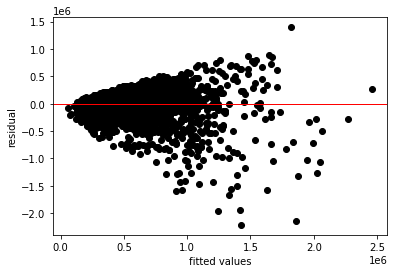

In [109]:
#Residual plot

plt.scatter(admit_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

*   Our residuals are centered around a mean that is very close to o, we can hence say our data is homogeneous. 
Lets perform a bartlett's test to be sure. 


In [110]:
#Conducting the bartlett's test
#

test_result, p_value = sp.stats.bartlett(admit_predict, residuals)

degree_of_freedom = len(admit_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)


if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

the variances are homogeneous!


## Multiple Linear Regression

In [111]:
#Splitting our data into train and test
#
X=df_re2.iloc[ :, 1:5].values
y=df_re2.iloc[ :, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
# Calculating our coefficients 
regressor.coef_

array([-6.21714382e+15,  8.88036000e+05,  6.21714382e+15,  6.21714382e+15])

In [113]:
y_pred = regressor.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,4.322000e+03,4.322000e+03
mean,5.434344e+05,5.363864e+05
std,3.625612e+05,2.606969e+05
min,8.100000e+04,5.706109e+04
25%,3.230000e+05,3.545971e+05
50%,4.500000e+05,4.845811e+05
75%,6.500000e+05,6.573811e+05
max,4.000000e+06,2.460901e+06


In [114]:
#Calculating the RMS
#***
#

y_pred = regressor.predict(X_test)
 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 248242.89947370568


## Quantile Regression

In [211]:
#Previewing the dataset

df_re2.head()

,price,sqft_living,waterfront,sqft_above,sqft_basement,lat
0,221900.0,1180,0,1180,0,47.5112
1,538000.0,2570,0,2170,400,47.7210
2,180000.0,770,0,770,0,47.7379
3,604000.0,1960,0,1050,910,47.5208
4,510000.0,1680,0,1680,0,47.6168


In [214]:
#defining the dependent and independent variables
#
#X = df_re2[['sqft_living', 'waterfront', 'sqft_above', 'sqft_basement', 'lat']].values
#**

X = df_re2[['sqft_living']].values
y = df_re2['price'].values

In [213]:
#regression coefficients
#**

import statsmodels.formula.api as smf

mod = smf.quantreg('y ~ X', df_re2)
res = mod.fit(q=.5)
 
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2479
Model:                       QuantReg   Bandwidth:                   3.151e+04
Method:                 Least Squares   Sparsity:                    4.835e+05
Date:                Mon, 03 Aug 2020   No. Observations:                21610
Time:                        00:17:45   Df Residuals:                    21608
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.27e+04   4071.040     12.944      0.000    4.47e+04    6.07e+04
X            216.7401      1.791    121.048      0.000     213.231     220.250

The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.


In [215]:
X = df_re2[['sqft_living']]
y = df_re2['price']

# get the quantile information for all the columns in X
mod = smf.quantreg('y ~ X', df_re2)
res1 = mod.fit(q = 0.1)
res2 = mod.fit(q = 0.2)
res3 = mod.fit(q = 0.5)
res4 = mod.fit(q = 0.9)

# display the results 
print("10th Percentile: ", res1.summary())
print("\n20th Percentile: ", res2.summary())
print("\n50th Percentile: ", res3.summary())
print("\n90th Percentile: ", res4.summary())

10th Percentile:                           QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.1766
Model:                       QuantReg   Bandwidth:                   2.776e+04
Method:                 Least Squares   Sparsity:                    4.717e+05
Date:                Mon, 03 Aug 2020   No. Observations:                21610
Time:                        00:18:51   Df Residuals:                    21608
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.284e+04   2068.490     20.709      0.000    3.88e+04    4.69e+04
X            123.6364      0.880    140.446      0.000     121.911     125.362

The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other nu

In [218]:
#Splitting the dataset into x and y

X = df_re2[['waterfront']].values
y = df_re2['price'].values



In [219]:
#regression coefficients
#

import statsmodels.formula.api as smf

mod = smf.quantreg('y ~ X', df_re2)
res = mod.fit(q=.5)
 
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:              0.01300
Model:                       QuantReg   Bandwidth:                   4.181e+04
Method:                 Least Squares   Sparsity:                    5.661e+05
Date:                Mon, 03 Aug 2020   No. Observations:                21610
Time:                        00:25:23   Df Residuals:                    21608
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     4.5e+05   1932.739    232.830      0.000    4.46e+05    4.54e+05
X             9.5e+05   2.23e+04     42.689      0.000    9.06e+05    9.94e+05


In [220]:
X = df_re2[['waterfront']].values
y = df_re2['price'].values

# get the quantile information for all the columns in X
mod = smf.quantreg('y ~ X', df_re2)
res1 = mod.fit(q = 0.1)
res2 = mod.fit(q = 0.2)
res3 = mod.fit(q = 0.5)
res4 = mod.fit(q = 0.9)

# display the results 
print("10th Percentile: ", res1.summary())
print("\n20th Percentile: ", res2.summary())
print("\n50th Percentile: ", res3.summary())
print("\n90th Percentile: ", res4.summary())

10th Percentile:                           QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:             0.003617
Model:                       QuantReg   Bandwidth:                   3.424e+04
Method:                 Least Squares   Sparsity:                    5.763e+05
Date:                Mon, 03 Aug 2020   No. Observations:                21610
Time:                        00:26:33   Df Residuals:                    21608
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.45e+05   1186.681    206.458      0.000    2.43e+05    2.47e+05
X            2.83e+05   1.38e+04     20.436      0.000    2.56e+05     3.1e+05

20th Percentile:                           QuantReg Regression Results                          
Dep. Variable: 

## Lasso Regression

In [187]:
#splitting the dataset to y and X

X = df_re2[['sqft_living', 'waterfront', 'sqft_above', 'sqft_basement', 'lat']]
y = df_re2['price']


In [188]:
#perform lasso regression

class lass:
  def __init__(self, X, y):
    self.X = X
    self.y = y

  def lass1(self):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
    parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

    linear = linear_model.LinearRegression()
    lasso = linear_model.Lasso() 
    gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

    # Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
    gridlasso.fit(X_train, y_train) 
    linear.fit(X_train, y_train) 
    print("lasso best parameters:", gridlasso.best_params_) 
    print("lasso score:", gridlasso.score(X_test, y_test))
    print("linear score:", linear.score(X_test, y_test)) 
    print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
    print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
    print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
    print("linear coef:", linear.coef_)

    def viz(X_train, y_train):
      coefsLasso = []
      alphasLasso = np.arange(0,20, 0.1)
      for i in range(200):
        lasso = linear_model.Lasso(alpha = alphasLasso[i])
        lasso.fit(X_train, y_train)
        coefsLasso.append(lasso.coef_)
        
      # Building Lasso coefficient plots
      plt.figure(figsize = (16,7))

      plt.subplot(121)
      plt.plot(alphasLasso, coefsLasso)
      plt.title('Lasso coefficients')
      plt.xlabel('alpha')
      plt.ylabel('coefs')

      plt.show()
    viz(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79117508841550.62, tolerance: 174793500723.26392
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77483905881099.81, tolerance: 170001415742.8706
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81021697088304.62, tolerance: 173947103640.5263
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80791112643

lasso best parameters: {'alpha': 0.1}
lasso score: 0.6079833272440569
linear score: 0.6079834976218788
lasso MSE: 53311135141.39813
linear MSE: 53311111971.37574
lasso best estimator coef: [ 2.74493926e+02  8.16803393e+05 -6.09855853e+00 -1.68952015e+01
  7.38788825e+05]
linear coef: [1.75331184e+02 8.16815843e+05 9.30640754e+01 8.22671089e+01
 7.38794345e+05]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 430475023078263.1, tolerance: 218169097718.45715
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100220907479634.19, tolerance: 218169097718.45715
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100222123909006.0, tolerance: 218169097718.45715
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10022334

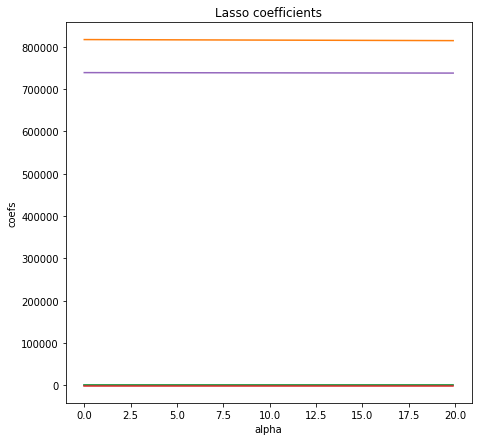

In [189]:
a = lass(X, y)
a.lass1()

In [190]:
# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6061634468205968
lasso MSE: 53155092363.8785
lasso coef: [ 2.74588070e+02  8.56012534e+05 -5.17625891e+00 -1.84198867e+01
  7.32185909e+05]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133941864456184.88, tolerance: 291664533601.623
  positive)


In [192]:
#splitting data into training and testing
#building lasso
#choosing a regularization parameter

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso(alpha = 1.8) 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 0.1}
lasso score: 0.6079833272440569
linear score: 0.6079834976218788
lasso MSE: 53311135141.39813
linear MSE: 53311111971.37574
lasso best estimator coef: [ 2.74493926e+02  8.16803393e+05 -6.09855853e+00 -1.68952015e+01
  7.38788825e+05]
linear coef: [1.75331184e+02 8.16815843e+05 9.30640754e+01 8.22671089e+01
 7.38794345e+05]


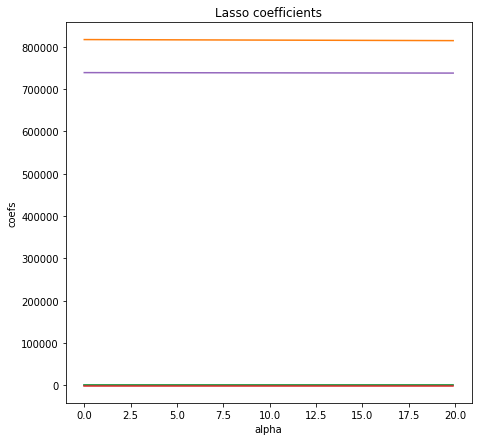

In [194]:
#Visualization
#

coefsLasso = [] 

alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

## Ridge Regression

In [121]:
df_re2.head()

,price,sqft_living,waterfront,sqft_above,sqft_basement,lat
0,221900.0,1180,0,1180,0,47.5112
1,538000.0,2570,0,2170,400,47.7210
2,180000.0,770,0,770,0,47.7379
3,604000.0,1960,0,1050,910,47.5208
4,510000.0,1680,0,1680,0,47.6168


In [173]:
#Setting the dependent and independent variables 
#

#X=df_re2.iloc[ :, 1:5]
#y=df_re2.iloc[ :, 0]

X = df_re2[['sqft_living', 'waterfront', 'sqft_above', 'sqft_basement', 'lat']]
y = df_re2['price']


In [184]:
#Determining the most appropriate value of L2
#

ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-1,1,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)



In [185]:
#using the .fit function to run the model and then use the .best_params_ and
# .best_scores_ function to determine the models strength

search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

53553423764.747665

In [186]:
#fitting the model with the ridge information and finding the MSE

ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

53157938235.77707


## Elastic Net Regression

In [195]:
#Importing libraries
#

pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)

from sklearn.linear_model import ElasticNet

In [196]:
#Splitting our dataset

X = df_re2[['sqft_living', 'waterfront', 'sqft_above', 'sqft_basement', 'lat']]
y = df_re2['price']

In [197]:
#Elastic Net Modelling
#

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [198]:
#Fitting our model and displaying best parameters
#

search.fit(X,y)
search.best_params_
abs(search.best_score_)

53352114923.571396

In [199]:
#hyperparameter tuning 
#

elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

98708515559.00839


# 8. Challenging the Solution

# 9. Follow up questions 


1. Did we have the right data? **Yes**

2. Do we need other data to answer our question? **No**

3. Did we have the right question? **Yes**

# Conclusion